In [26]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [27]:
# loading the dataset
ds = pd.read_csv(r'C:\Users\Jaya Krishna Sai\Desktop\Python\segcluster\Mall_Customers.csv')    

In [45]:
ds.isnull().sum() # checking for missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [47]:
ds.duplicated().sum() # checking for duplicates

0

In [28]:
# By using label encoder we are converting the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['Gender']= le.fit_transform(ds['Gender'])

In [29]:
# Scaling the data using Standard Scaler, we can also use MinMax Scaler
scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)
ds_scaled = pd.DataFrame(ds_scaled, columns=ds.columns)

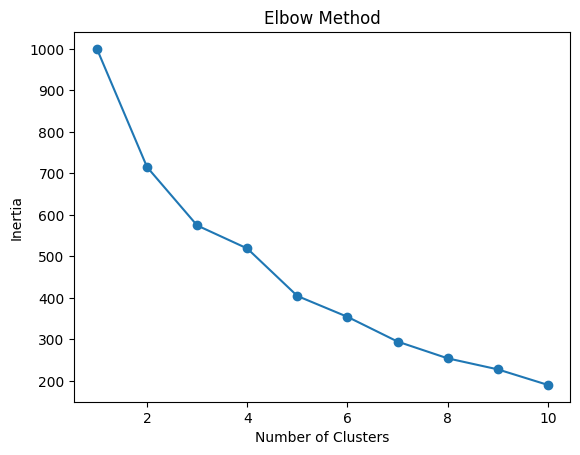

In [30]:
# Finding the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,random_state=42)
    kmeans.fit(ds_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11),sse,marker = 'o')
plt.title('Elbow Method')
plt.show()

In [33]:
# From the above plot we can consider the optimal number of clusters is 5
cluster =5
kmeans = KMeans(n_clusters= cluster,random_state=42)
ds_scaled['Cluster'] = kmeans.fit_predict(ds_scaled)

In [37]:
# by using isolation forest we find and remove the outliers
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05)
outliers = iso.fit_predict(ds_scaled)
ds_scaled['Outliers'] = outliers
outlier_index = np.where(outliers==-1)
cleaned_data = ds_scaled.drop(outlier_index[0])



In [44]:
cleaned_data.head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Outliers
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,2,1
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,2,1
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,2,1
5,-1.636808,-0.886405,-1.209269,-1.662660,1.001596,2,1
6,-1.619488,-0.886405,-0.276302,-1.624491,-1.715913,2,1
7,-1.602167,-0.886405,-1.137502,-1.624491,1.700384,2,1
9,-1.567526,-0.886405,-0.635135,-1.586321,0.846310,2,1
11,-1.532884,-0.886405,-0.276302,-1.586321,1.894492,2,1
12,-1.515563,-0.886405,1.374332,-1.548152,-1.366519,0,1
13,-1.498243,-0.886405,-1.065735,-1.548152,1.040418,2,1


<Axes: >

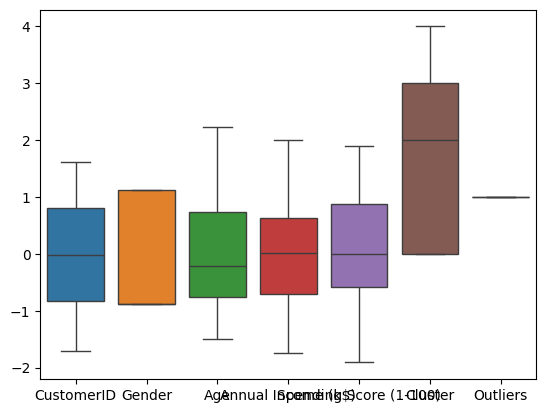

In [48]:
# checking if there are any more outliers using box plot
sns.boxplot(cleaned_data)

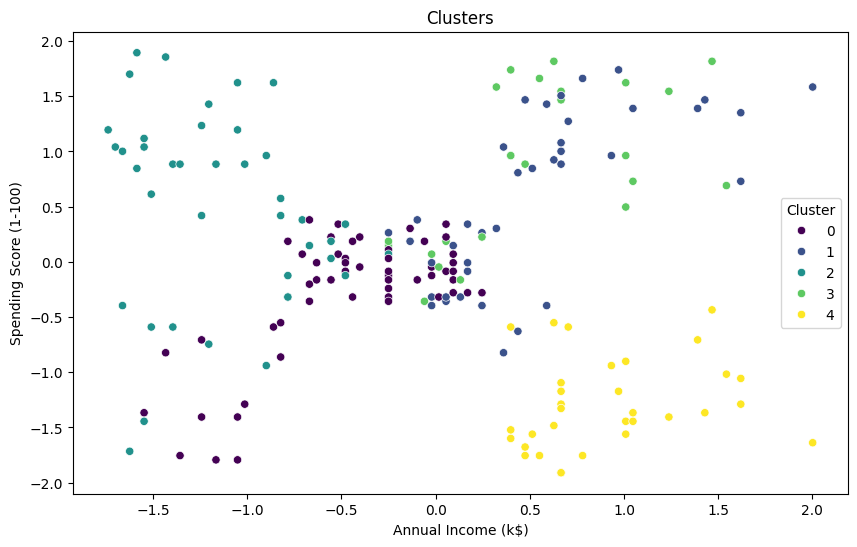

In [39]:
# plotting the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(cleaned_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters')
plt.show()

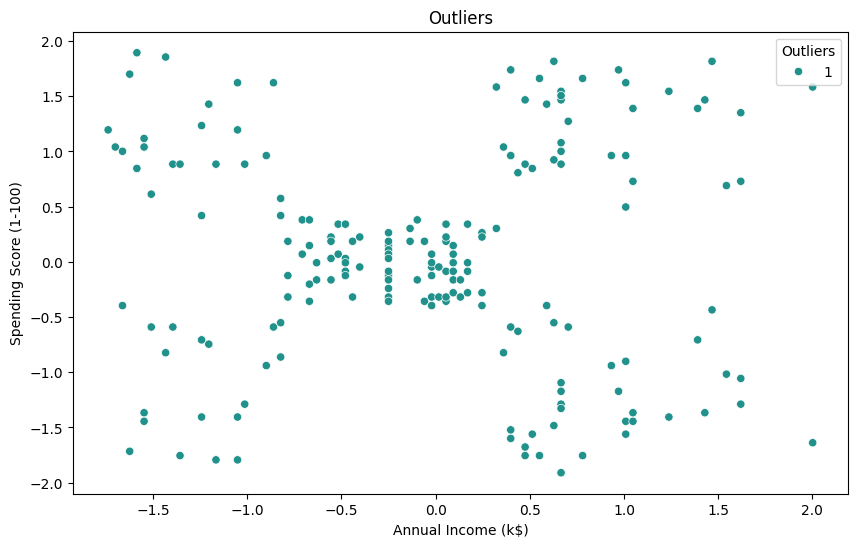

In [40]:
#plotting the outliers
plt.figure(figsize=(10,6))
sns.scatterplot(cleaned_data,x='Annual Income (k$)', y='Spending Score (1-100)', hue='Outliers', palette='viridis')
plt.title('Outliers')
plt.show()

In [41]:
# finding the cluster summary
cluster_summary = cleaned_data.groupby('Cluster').mean()

In [42]:
print(cluster_summary)

         CustomerID    Gender       Age  Annual Income (k$)  \
Cluster                                                       
0         -0.528282  0.008954  1.167006           -0.461737   
1          0.626433 -0.886405 -0.565209            0.529635   
2         -1.173796 -0.149372 -0.818928           -1.132943   
3          0.622824  1.128152 -0.590281            0.528901   
4          1.054399  0.309738  0.205881            0.914969   

         Spending Score (1-100)  Outliers  
Cluster                                    
0                     -0.293175       1.0  
1                      0.573564       1.0  
2                      0.476085       1.0  
3                      0.864103       1.0  
4                     -1.290089       1.0  
